![logo](../../figs/holberton_logo.png)

# Fruits Recognition Using Convolutional Neural Networks

## Executive Summary

### Problem description

Our goal is to classify images of fruits and vegetables into their respective categories. The dataset used for this task is the [Fruits-360 dataset](https://data.mendeley.com/datasets/rp73yg93n8/1), which contains images of various fruits and vegetables belonging to 131 different classes.

### Importance:
Image classification tasks like this are essential in various real-world applications, such as food recognition systems, agricultural automation, and dietary monitoring apps. By accurately identifying different types of fruits and vegetables, we can enable automation in sorting, inventory management, and quality control processes, leading to increased efficiency and productivity.

### Evaluation metrics:
To evaluate our approach, we will use common evaluation metrics for image classification tasks such as accuracy, precision, recall, and F1-score. 

We will use accuracy (the proportion of correctly classified images) as the primary metric used to evaluate the performance of the model. 

### Technical approach (CNN):

Convolutional Neural Networks (CNNs) are the state-of-the-art architecture for image classification tasks. CNNs are well-suited for learning spatial hierarchies of features from images through the use of convolutional layers, pooling layers, and non-linear activation functions. 

In this problem, we will use a CNN architecture consisting of multiple convolutional layers followed by max-pooling layers to extract features from the input images. The extracted features are then flattened and fed into fully connected layers to perform classification. 

The model is trained using a dataset of labeled images, where the network learns to map input images to their corresponding class labels by minimizing a suitable loss function using an optimization algorithm such as Adam. 

The performance of the model is evaluated on a separate validation dataset, and hyperparameters are tuned accordingly to improve performance.

## Fruits 360 Dataset

Fruits 360 dataset is a dataset of images containing fruits. The following fruits are included: Apples (different varieties: Golden, Golden-Red, Granny Smith, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red), Cactus fruit, Cantaloupe (2 varieties), Carambula, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Clementine, Cocos, Dates, Granadilla, Grape (Pink, White, White2), Grapefruit (Pink, White), Guava, Huckleberry, Kiwi, Kaki, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine, Orange, Papaya, Passion fruit, Peach, Pepino, Pear (different varieties, Abate, Monster, Williams), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum, Pomegranate, Quince, Rambutan, Raspberry, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red), Walnut.

### Dataset properties

- Total number of images: `55244`.

- Training set size: `41322` images (one fruit per image).

- Test set size: `13877` images (one fruit per image).

- Multi-fruits set size: `45` images (more than one fruit (or fruit class) per image)

- Image size: `100x100` pixels.

## Load and Understand the Dataset

In this step, we're preparing the dataset for training and validation. 

#### Data Directory Setup:
We define the directories where our training and testing data are located (`train_dir` and `test_dir`).

#### Loading Training Dataset:
Using TensorFlow's `image_dataset_from_directory` function, we load the training dataset from the specified directory (`train_dir`). **This function automatically reads images from subdirectories, assigns labels based on the subdirectory names, and converts them into TensorFlow datasets.**

#### Loading Validation Dataset:
Similarly, we load the validation dataset using the same function, but this time specifying the validation subset. This allows us to evaluate the model's performance during training.

#### Print Class Names:
We print out the class names extracted from the training dataset. These class names represent the different categories of fruits and vegetables present in the dataset.

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the directories for training and testing data
# Replace with your own path
train_dir = 'fruits-360_dataset/fruits-360/Training'
test_dir = 'fruits-360_dataset/fruits-360/Test'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)

Found 41322 files belonging to 81 classes.
Using 33058 files for training.
Found 41322 files belonging to 81 classes.
Using 8264 files for validation.


In [32]:
# Print class names
class_names = train_ds.class_names

num_classes = len(class_names)

for class_name in class_names:
    print(class_name)

Apple Braeburn
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious
Apple Red Yellow
Apricot
Avocado
Avocado ripe
Banana
Banana Red
Cactus fruit
Cantaloupe 1
Cantaloupe 2
Carambula
Cherry 1
Cherry 2
Cherry Rainier
Cherry Wax Black
Cherry Wax Red
Cherry Wax Yellow
Clementine
Cocos
Dates
Granadilla
Grape Pink
Grape White
Grape White 2
Grapefruit Pink
Grapefruit White
Guava
Huckleberry
Kaki
Kiwi
Kumquats
Lemon
Lemon Meyer
Limes
Lychee
Mandarine
Mango
Maracuja
Melon Piel de Sapo
Mulberry
Nectarine
Orange
Papaya
Passion Fruit
Peach
Peach Flat
Pear
Pear Abate
Pear Monster
Pear Williams
Pepino
Physalis
Physalis with Husk
Pineapple
Pineapple Mini
Pitahaya Red
Plum
Pomegranate
Quince
Rambutan
Raspberry
Salak
Strawberry
Strawberry Wedge
Tamarillo
Tangelo
Tomato 1
Tomato 2
Tomato 3
Tomato 4
Tomato Cherry Red
Tomato Maroon
Walnut


### Visualize a Sample of the Dataset

To better understand our data, we load a batch of images and their corresponding labels from the training dataset and visualize them using Matplotlib. 

First, we extract one batch of images and labels using the `take(1)` method, then converts the data to `NumPy` arrays for visualization. 

The images are plotted in a row with their respective class labels as titles, allowing for a quick visual inspection of the dataset's content and structure.

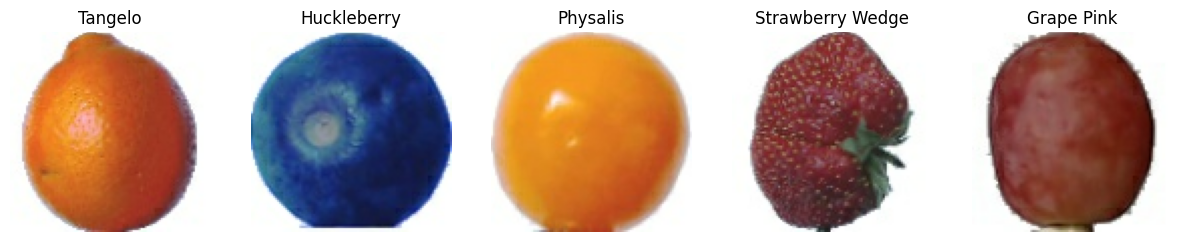

In [33]:
import matplotlib.pyplot as plt

# Load a batch of images and labels
for images, labels in train_ds.take(1):  
    batch_images = images.numpy()
    batch_labels = labels.numpy()

# Visualize the images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(batch_images[i].astype('uint8'))  
    plt.title(class_names[batch_labels[i]])
    plt.axis('off')
plt.show()


## Building Convolutional Neural Network

### Setup the Sequential Model

When working with libraries like `Keras` and `TensorFlow` for training and fine-tuning parameters on image data, it's essential to utilize the base **Sequential** model. This model will be invoked to ensure proper handling and manipulation of the data within these frameworks.

### Build Convolutional Architecture

We will use a Convolutional Neural Network (CNN) consisting of **three convolutional layers followed by max-pooling layers** for downsampling, a **flattening layer** to convert the output of the convolutional layers into a 1-dimensional vector, a **dense hidden layer** with ReLU activation, and an output layer with softmax activation for multi-class classification. 

The CNN is compiled with the Adam optimizer and sparse categorical crossentropy loss function for training.

#### Convolutional layer

In this architecture, the convolutional layers play a crucial role in extracting features from the input images. 
These **convolutional layers are responsible for extracting hierarchical features from the input images**, progressively capturing and abstracting information relevant for classification. The use of ReLU activation introduces non-linearity.

![Convolution](../img/kernel.gif)

##### Choice of filer numbers and sizes

**The number of filters in a convolutional layer determines the depth of the feature maps produced by that layer**. Increasing the number of filters allows the network to capture more diverse and complex features from the input images.

In this architecture, the filter size is kept constant at `(3, 3)` for all convolutional layers, which is a common practice in CNNs. This size is small enough to capture local patterns and details in the images while also allowing the network to learn higher-level features through multiple layers of convolution.

The decision to increase the number of filters from `32` to `64` to `128` in successive convolutional layers enables the network to learn increasingly abstract and sophisticated features. This hierarchical feature extraction process is essential for improving the network's ability to discriminate between different classes in the dataset.

#### Pooling layer

The **pooling layer, specifically the max-pooling layer in this architecture, plays a crucial role in reducing the spatial dimensions of the feature maps produced by the convolutional layers**. Max-pooling achieves this reduction by selecting the maximum value from each local region of the feature maps. Pooling helps with

##### Dimensionality Reduction and Overfitting Avoidance
Max-pooling reduces spatial dimensions, aiding computational efficiency and controlling overfitting.

##### Translation Invariance

Max-pooling selects maximum values from local regions, ensuring robustness to object position variations.

![Alt Text](../img/pool.gif)

#### Flatten and dense layer

- **Flatten Layer**: The flatten layer transforms the multi-dimensional feature maps produced by the convolutional layers into a one-dimensional vector. This vector representation is suitable for input to the dense layers, enabling them to process the extracted features as a single continuous sequence.

- **Dense Layer**: Dense layers, also known as fully connected layers, play a crucial role in learning complex patterns and making predictions. Each neuron in a dense layer is connected to every neuron in the preceding layer, allowing it to learn nonlinear relationships between features. The dense layer's parameters are learned through backpropagation during training, enabling the network to adapt and improve its performance on the given task.

![Alt Text](../img/flat.png)

In [39]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 81)             │        10,449 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,225 (6.65 MB)

 Trainable params: 1,742,225 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation

The goal of compiling the model is to **configure the training process and provide an overview of the model's architecture** and parameters:

Model compilation onfigures the model for training by specifying the optimizer, loss function, and evaluation metrics. In this case, the **Adam optimizer is chosen for gradient-based optimization**, **sparse categorical crossentropy** is selected as the loss function for multi-class classification tasks, and **accuracy** is chosen as the metric to monitor during training.

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Training

Our goal is to ensure that the model is trained efficiently while avoiding overfitting, as training is halted when the model's performance on the validation set begins to degrade.

The goal of incorporating early stopping is to prevent overfitting and improve the efficiency of model training by terminating the training process when the validation loss starts to increase consistently. Here's a summary of the process and its key components:

- The model is trained using the fit method, with the training dataset (`train_ds`) and validation dataset (`val_ds`) specified. The number of training epochs is set to `20`. 
- The callbacks parameter is used to include the EarlyStopping callback, ensuring that the training process is monitored and terminated based on the defined criteria.

In [42]:
Early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(train_ds, epochs=10, validation_data=val_ds, batch_size=64, callbacks=[Early_stopping]) 

Epoch 1/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.7124 - loss: 2.3512 - val_accuracy: 0.9541 - val_loss: 0.2152
Epoch 2/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9732 - loss: 0.0897 - val_accuracy: 0.9616 - val_loss: 0.1263
Epoch 3/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9810 - loss: 0.0609 - val_accuracy: 0.9786 - val_loss: 0.0660
Epoch 4/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9714 - loss: 0.1012 - val_accuracy: 0.9944 - val_loss: 0.0082
Epoch 5/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.9817 - loss: 0.0681 - val_accuracy: 0.9936 - val_loss: 0.0111
Epoch 6/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.9871 - loss: 0.0406 - val_accuracy: 0.9943 - val_loss: 0.0092
Epoch 7/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.9940 - loss: 0.0119 - val_accuracy: 0.8756 - val_loss: 0.5882
Epoch 8/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.9670 -

### Visualize Results

Now, we visualize the training and validation accuracy over epochs. To do that, we create a line plot where the x-axis represents the epochs, and the y-axis represents the accuracy. The plot shows the trend of both training and validation accuracy throughout the training process, allowing for an assessment of the model's performance and potential overfitting.

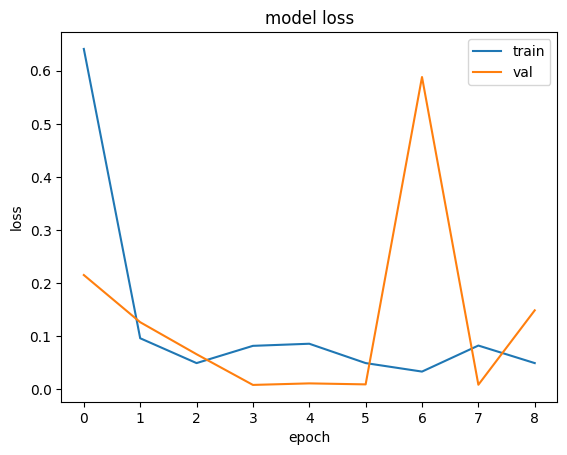

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

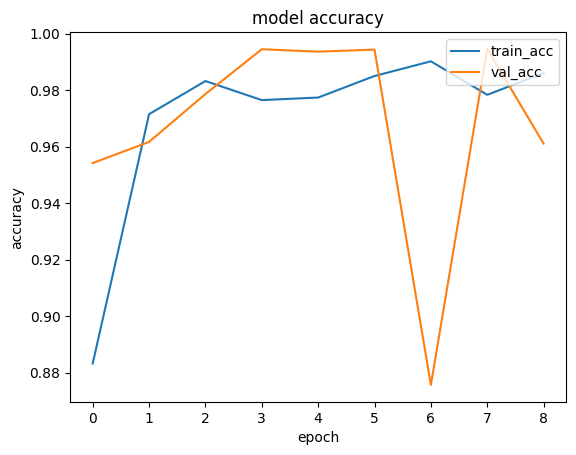

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper right')
plt.show()

## Testing on Unseen Data

This code segment loads the testing dataset without preprocessing using the image_dataset_from_directory function from TensorFlow. The testing dataset is loaded from the specified directory (`test_dir`) with a batch size of `32` and image size of `100x100` pixels. 

The shuffle parameter is set to `False` to maintain the order of data samples during evaluation. 

Subsequently, the model is evaluated on the testing dataset using the evaluate method, which computes the test loss and accuracy. Finally, the test loss and accuracy values are printed to the console for evaluation of the model's performance on unseen data.

In [49]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=False,
)

test_loss, test_acc = model.evaluate(test_ds)

print('Test accuracy:', test_acc)
print("Test loss:", test_loss)

Found 13877 files belonging to 81 classes.
434/434 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9377 - loss: 0.2718
Test accuracy: 0.948908269405365
Test loss: 0.2644902169704437


### Happy Coding 